# Trabajo Semanal 4

### Joaquin Ezequiel Alvarez Olmedo

El trabajo semanal 4 consiste en diseñar un filtro aproximando mediante Chebyshev que cumpla con la siguiente plantilla de diseño:

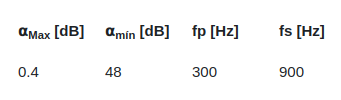

Para comenzar, determinamos los parametros n y $ \xi^{2} $:

$ \xi^{2} = 10^{\frac{\alpha max}{10} - 1} = 10^{\frac{0.4}{10} - 1} = 0.096 \cong 0.1 $

$ \alpha min = 10\log{(1 + \xi^{2}\cosh^{2}({n\cosh^{-1}{(w_s)}})} = 10\log{(1 + 0.1\cosh^{2}(1.76n))} $ Donde $ w_s = 3 $, normalizada respecto de $ w_p $

Despejando n, obtenemos $ n = 4.16 \cong 5 $

Con estos datos, armamos $ |T(jw)|^{2} $:

$ |T(jw)|^{2} = \frac{1}{1 + 0.1C_5^{2}(w)} $


Desarrollamos C5:

$ C_n = 2w*C(n-1) - C(n-2) $

$ C_0 = 1 $

$ C_1 = w $

$ C_2 = 2w^{2} - 1 $

$ C_3 = 4w^{3} - 3w $

$ C_4 = 8w^{4} - 8w^{2} - 1 $

$ C_5 = 16w^{5} - 20w^{3} - 5w $

$ |T(jw)|^{2} = \frac{1}{1 + 0.1(16w^{5} - 20w^{3} - 5w)^{2}} $

A partir de este punto el álgebra se vuelve irracionalmente tediosa. Recurrimos a la simulación para obtener T(S):

#### Aproximacion de Chebyshev

#### Chebyshev1_ord_5_rip_0.4_att_48

<IPython.core.display.Math object>

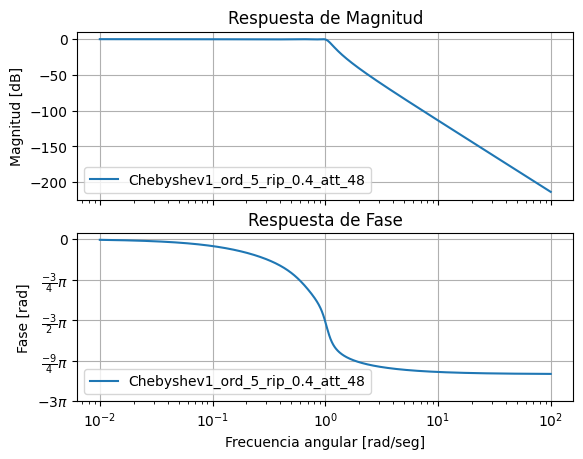

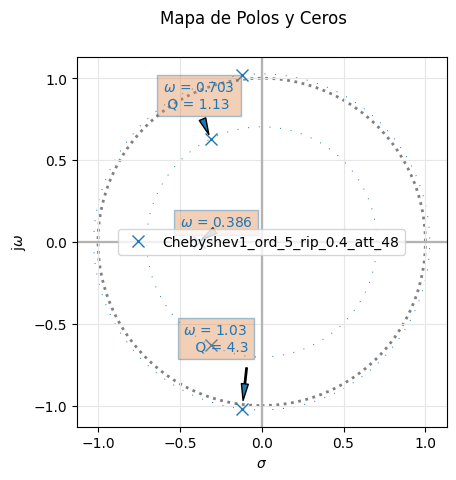

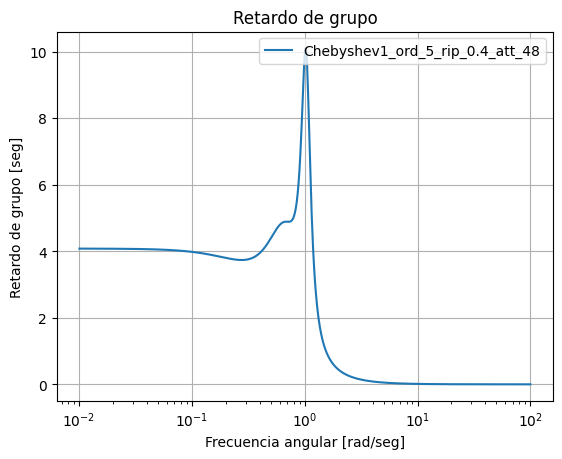

In [1]:
#%% Importacion de librerias

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

#%% Funcion que devuelve la transferencia del filtro maxima planicidad

def sim_aprox(aproxs, orders2analyze, ripple, attenuation):

    all_sys = []
    filter_names = []

    for (this_aprox, this_order, this_ripple, this_att) in zip(aproxs, orders2analyze, ripple, attenuation):

        if this_aprox == 'Butterworth':

            z,p,k = sig.buttap(this_order)

            eps = np.sqrt( 10**(this_ripple/10) - 1 )
            num, den = sig.zpk2tf(z,p,k)
            num, den = sig.lp2lp(num, den, eps**(-1/this_order))

            z,p,k = sig.tf2zpk(num, den)

        elif this_aprox == 'Chebyshev1':

            z,p,k = sig.cheb1ap(this_order, this_ripple)

        elif this_aprox == 'Chebyshev2':

            z,p,k = sig.cheb2ap(this_order, this_att)

        elif this_aprox == 'Bessel':

            z,p,k = sig.besselap(this_order, norm='delay')

        elif this_aprox == 'Cauer':

            z,p,k = sig.ellipap(this_order, this_ripple, this_att)


        num, den = sig.zpk2tf(z,p,k)

        
        all_sys.append(sig.TransferFunction(num,den))

        this_label = this_aprox + '_ord_' + str(this_order) + '_rip_' + str(this_ripple)+ '_att_' + str(this_att)
        
        print_subtitle(this_label)
        # factorizamos en SOS's
        this_sos = tf2sos_analog(num, den)
        
        pretty_print_SOS(this_sos, mode='omegayq')
        
        filter_names.append(this_label)
        
    # el caracter "_" descarta la salida de la función
    _ = analyze_sys( all_sys, filter_names )

    return( all_sys, filter_names )

#%% Parametrizacion del filtro mediante el orden

#aprox_name = 'Butterworth'
aprox_name = 'Chebyshev1'
#aprox_name = 'Chebyshev2'
#aprox_name = 'Bessel'
#aprox_name = 'Cauer'

# parametrizamos el orden para cada aproximación
orders2analyze = [5]

# Mismo requerimiento de ripple y atenuación
aproxs = [aprox_name] * len(orders2analyze)
ripple = [0.4] * len(orders2analyze) # Alfa maximo en dB
attenuation = [48] * len(orders2analyze) # Alfa minimo en dB


print_subtitle('Aproximacion de Chebyshev')

_ = sim_aprox(aproxs, orders2analyze, ripple, attenuation)

Ahora que sabemos las distintas secciones que necesitamos armar para lograr la transferencia deseada, buscamos implementar el filtro mediante un circuito KHN:

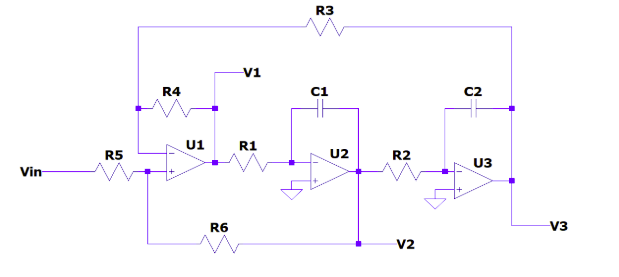

Planteamos las ecuaciones de nodos:

